## Swap test

In [5]:
%matplotlib inline

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from math import pi

from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')

data = [0.01, 0.02, 0.03, 0.04, 0.05, 1.31, 1.32, 1.33, 1.34, 1.35]

qr_distance = QuantumRegister(1)
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr_distance, qr, cr)

i=0
j=6

qc.h(qr_distance[0])
qc.h(qr[0])
qc.h(qr[1])
qc.u3(data[i], pi, pi, qr[0])
qc.u3(data[j], pi, pi, qr[1])
qc.cswap(qr_distance[0], qr[0], qr[1])
qc.h(qr_distance[0])

stvBackend = Aer.get_backend('statevector_simulator')
job = execute (qc, stvBackend)
state = job.result().get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ", precision=1)


<IPython.core.display.Math object>

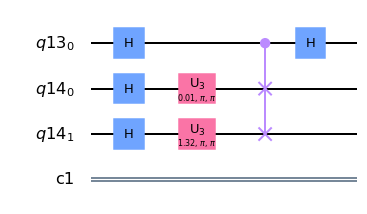

In [6]:
qc.draw()

In [7]:
qc.measure(qr_distance[0], cr[0])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc,   backend=backend, shots=1024)
result = job.result()

print (result.get_counts())

{'0': 832, '1': 192}
